# 오버워치 2 점수판 분석 AI

## 데이터 가져오기

In [1]:
import os
import pandas as pd


def load_stats_data(scoreboard_path=os.path.join('datasets')):
    return pd.concat(
        [
            pd.read_csv(os.path.join(scoreboard_path, 'draw.csv'), usecols=range(1, 10)),
            pd.read_csv(os.path.join(scoreboard_path, 'lose.csv'), usecols=range(1, 10)),
            pd.read_csv(os.path.join(scoreboard_path, 'win.csv'), usecols=range(1, 10))
        ]
    )

### 데이터 구조 훑어 보기

In [2]:
scoreboard = load_stats_data()
scoreboard.head()

,TEAM,ROLE,E,A,D,DMG,H,MIT,RESULT
0,1,TANK,30,5,19,19702,0,26844,DRAW
1,1,DAMAGE,43,0,9,14072,0,0,DRAW
2,1,DAMAGE,56,2,18,29354,1959,0,DRAW
3,1,SUPPORT,10,48,15,983,18277,0,DRAW
4,1,SUPPORT,28,28,13,6948,18287,0,DRAW


In [3]:
scoreboard.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1430 entries, 0 to 709
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   TEAM    1430 non-null   int64 
 1   ROLE    1430 non-null   object
 2   E       1430 non-null   int64 
 3   A       1430 non-null   int64 
 4   D       1430 non-null   int64 
 5   DMG     1430 non-null   int64 
 6   H       1430 non-null   int64 
 7   MIT     1430 non-null   int64 
 8   RESULT  1430 non-null   object
dtypes: int64(7), object(2)
memory usage: 111.7+ KB


In [4]:
scoreboard.describe()

,TEAM,E,A,D,DMG,H,MIT
count,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000
mean,1.500000,13.669930,7.455245,6.268531,6240.660140,3881.353846,2294.511189
std,0.500175,9.928584,8.458876,3.807003,4519.047797,5210.815773,4591.760515
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,6.000000,1.000000,3.000000,2688.000000,0.000000,0.000000
50%,1.500000,12.000000,4.000000,6.000000,5319.500000,783.000000,242.500000
75%,2.000000,20.000000,12.000000,9.000000,9461.250000,7451.000000,1803.750000
max,2.000000,56.000000,48.000000,21.000000,29354.000000,27756.000000,28366.000000


In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
IMAGES_PATH = os.path.join('.', 'images')
os.makedirs(IMAGES_PATH, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    print('그림 저장: ' + fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(os.path.join(IMAGES_PATH, fig_id + '.' + fig_extension), dpi=resolution, format=fig_extension)

그림 저장: attribute_histogram_plots


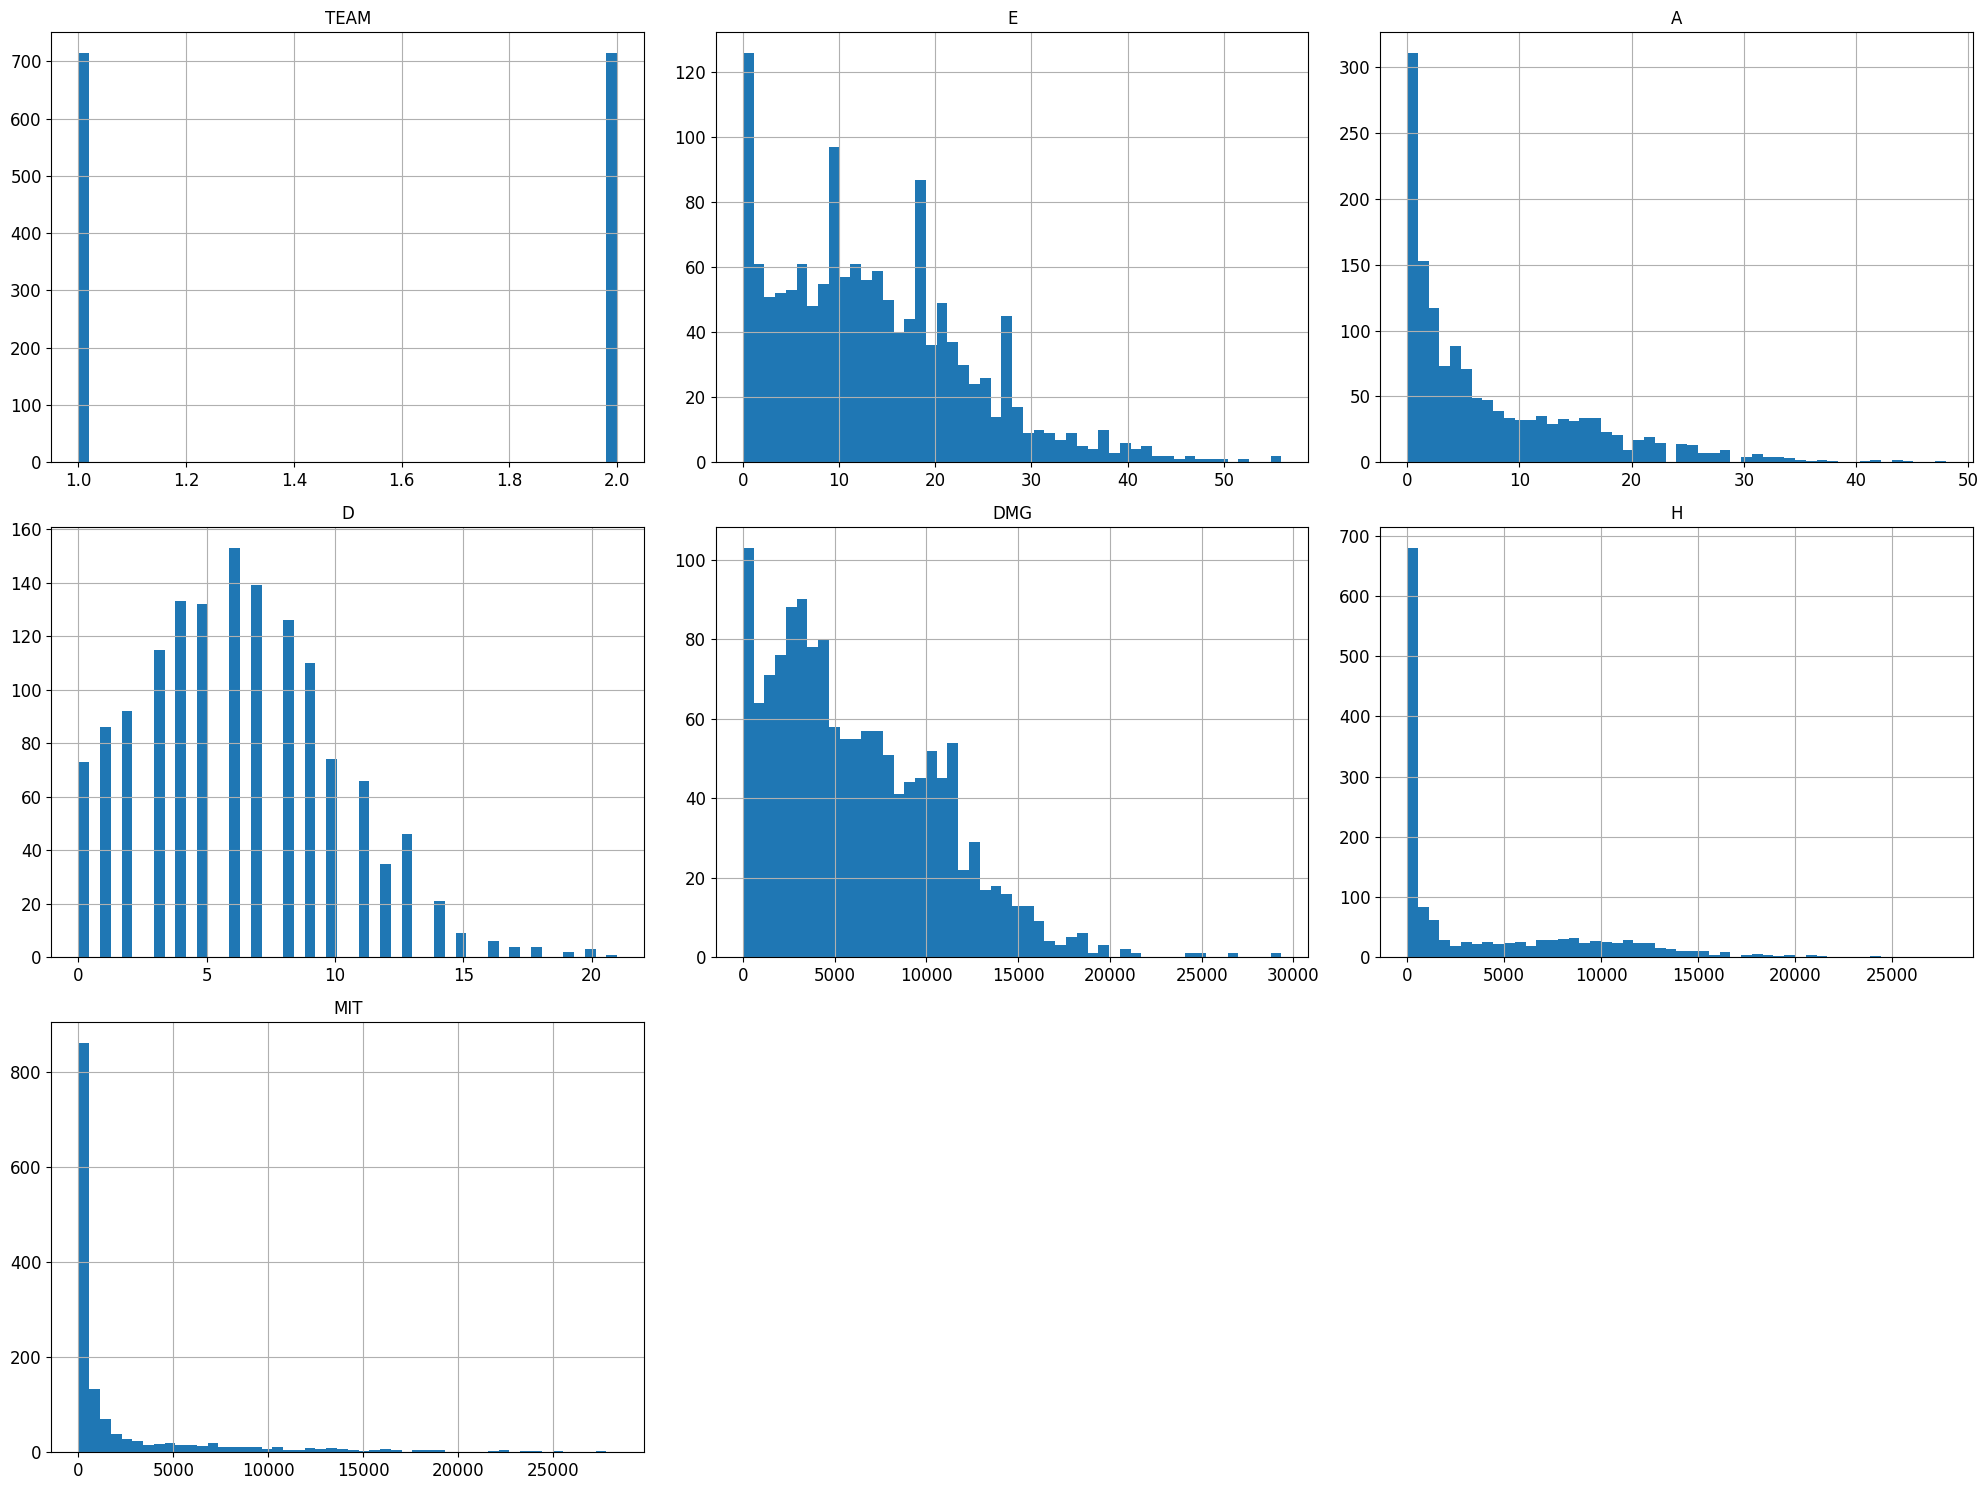

In [6]:
scoreboard.hist(bins=50, figsize=(20, 15))
save_fig('attribute_histogram_plots')

In [7]:
import numpy as np

X = np.c_[scoreboard[['TEAM', 'ROLE', 'E', 'A', 'D', 'DMG', 'H', 'MIT']]]
y = np.c_[scoreboard['RESULT']]

In [8]:
X.reshape((-1, 10, 8))[0]

array([[1, 'TANK', 30, 5, 19, 19702, 0, 26844],
       [1, 'DAMAGE', 43, 0, 9, 14072, 0, 0],
       [1, 'DAMAGE', 56, 2, 18, 29354, 1959, 0],
       [1, 'SUPPORT', 10, 48, 15, 983, 18277, 0],
       [1, 'SUPPORT', 28, 28, 13, 6948, 18287, 0],
       [2, 'TANK', 55, 14, 13, 24408, 3060, 14077],
       [2, 'DAMAGE', 47, 6, 18, 18533, 2069, 360],
       [2, 'DAMAGE', 41, 0, 16, 16157, 2052, 0],
       [2, 'SUPPORT', 17, 36, 12, 3040, 18193, 488],
       [2, 'SUPPORT', 14, 41, 13, 3417, 21117, 0]], dtype=object)

In [9]:
y.reshape((-1, 10))

array([['DRAW', 'DRAW', 'DRAW', ..., 'DRAW', 'DRAW', 'DRAW'],
       ['LOSE', 'LOSE', 'LOSE', ..., 'WIN', 'WIN', 'WIN'],
       ['LOSE', 'LOSE', 'LOSE', ..., 'WIN', 'WIN', 'WIN'],
       ...,
       ['WIN', 'WIN', 'WIN', ..., 'LOSE', 'LOSE', 'LOSE'],
       ['WIN', 'WIN', 'WIN', ..., 'LOSE', 'LOSE', 'LOSE'],
       ['WIN', 'WIN', 'WIN', ..., 'LOSE', 'LOSE', 'LOSE']], dtype=object)

### 테스트 세트 만들기